In [2]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def set_plot_style(ax, title=None, xlabel=None, ylabel=None, xscale='linear', yscale='linear', xlims=None, ylims=None, xticks=None, yticks=None, xticklabels=None, yticklabels=None, legend=True, legend_args={}, xticklabels_args={}, yticklabels_args={}):
    ax.set_title(title, fontweight='semibold')
    ax.set_xlabel(xlabel, fontweight='semibold', color='#454545')
    ax.set_ylabel(ylabel, fontweight='semibold', color='#454545')
    ax.set_xscale(xscale)
    ax.set_yscale(yscale)
    if legend: ax.legend(frameon = False,**legend_args)
    if not xlims is None: ax.set_xlim(xlims)
    if not ylims is None: ax.set_ylim(ylims)
    if not xticks is None: ax.set_xticks(xticks)
    if not yticks is None: ax.set_yticks(yticks)
    if not xticklabels is None: ax.set_xticklabels(xticklabels, **xticklabels_args)
    if not yticklabels is None: ax.set_xticklabels(yticklabels, **yticklabels_args)

    for spine in ('top', 'right'): 
        ax.spines[spine].set_visible(False)
    
plt.rcParams.update({'font.size': 10, 'font.style': 'normal', 'font.family':'serif'})

In [3]:
data = pd.read_excel('fede_data.xlsx')

In [143]:
data.shape

(6323, 6)

First simple processing

In [144]:
data = data[data.year != "rik"]
data = data[data.year.astype(int) >= 2000]
data.head()

,year,category,nominee,workers,winner,url
1,2000,"Best Engineered Album, Non-Classical",When I Look In Your Eyes,"Al Schmitt (engineer), Diana Krall (artist)",True,NaN
3,2000,Best Female R&B Vocal Performance,It's Not Right But It's Okay,Whitney Houston,True,NaN
5,2000,Best Jazz Instrumental Solo,In Walked Wayne,Wayne Shorter (soloist),True,NaN
7,2000,Best Instrumental Soloist Performance (without...,"Shostakovich: 24 Preludes & Fugues, Op. 87",Vladimir Ashkenazy (artist),True,NaN
8,2000,Best Alternative Music Performance,To Venus and Back,Tori Amos,False,NaN


Some other cleaning

In [145]:
data["url"] = data.url.fillna(0)
data["album"] = [True if re.match(r".*Album.*",x) else False for x in data.category]
data = data[data.album == True].drop("album",axis = 1) # keep only the albums
data = data[~data.category.str.contains("Classical")] # remove classical music
print(data.shape)
data.head(7)

(1500, 6)


,year,category,nominee,workers,winner,url
10,2000,Best Rap Album,Things Fall Apart,The Roots,False,0
13,2000,Best Rap Album,The Slim Shady LP,Eminem,True,0
18,2000,Best Soundtrack Album,The Prince of Egypt,NaN,False,0
19,2000,Best Historical Album,The Duke Ellington Centennial Edition - The Co...,"Orrin Keepnews (compilation producer), Steven ...",True,0
23,2000,Best Spoken Word Album,"The Autobiography Of Martin Luther King, Jr.",LeVar Burton,True,0
24,2000,Best Musical Album for Children,The Adventures of Elmo in Grouchland,Andy Hill (producer),True,0
26,2000,Best Soundtrack Album,Tarzan,"Phil Collins (artist/producer), Mark Mancina (...",True,0


Drop albums that lost a category but won another one

In [146]:
data = data.drop(index = data[(data.duplicated(subset = ['year', 'nominee'], keep = False)) & (data.winner == False)].index)
data.shape

(1475, 6)

REMEMBER THIS!!!!!!!

In [147]:
data = (data.drop_duplicates(subset = ['year', 'nominee']))
data.shape

(1452, 6)

Drop rows with manually inserted value 'delete'

In [148]:
data = data[data.url != "delete"].reset_index(drop=True)
print(data.shape)
data.head()

(1443, 6)


,year,category,nominee,workers,winner,url
0,2000,Best Rap Album,Things Fall Apart,The Roots,False,0
1,2000,Best Rap Album,The Slim Shady LP,Eminem,True,0
2,2000,Best Soundtrack Album,The Prince of Egypt,NaN,False,0
3,2000,Best Historical Album,The Duke Ellington Centennial Edition - The Co...,"Orrin Keepnews (compilation producer), Steven ...",True,0
4,2000,Best Spoken Word Album,"The Autobiography Of Martin Luther King, Jr.",LeVar Burton,True,0


Drop rows with missing value

In [149]:
data["workers"] = data.workers.fillna('')
data = data[data.workers != ''].reset_index(drop = True)

print(data.shape)
data.head()

(1407, 6)


,year,category,nominee,workers,winner,url
0,2000,Best Rap Album,Things Fall Apart,The Roots,False,0
1,2000,Best Rap Album,The Slim Shady LP,Eminem,True,0
2,2000,Best Historical Album,The Duke Ellington Centennial Edition - The Co...,"Orrin Keepnews (compilation producer), Steven ...",True,0
3,2000,Best Spoken Word Album,"The Autobiography Of Martin Luther King, Jr.",LeVar Burton,True,0
4,2000,Best Musical Album for Children,The Adventures of Elmo in Grouchland,Andy Hill (producer),True,0


In [94]:
#data.to_csv('data_cleaned_final_1.csv')     ## this dataset is the one to be merget with review batches

### Some visualization and analysis

Treated vs Control

In [95]:
data.winner.value_counts()

winner
True     829
False    578
Name: count, dtype: int64

In [96]:
temp = data.groupby(by='year')['winner'].value_counts().unstack().reset_index().fillna(0)

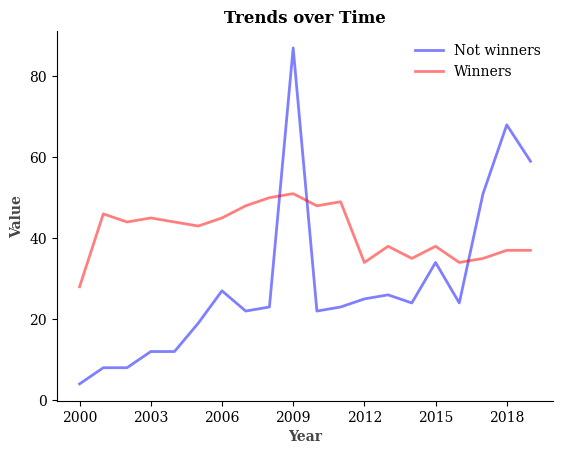

In [97]:
fig, ax = plt.subplots()
ax.plot(temp.year, temp[False], label='Not winners', linestyle='-', color='b', alpha = 0.5, lw = 2)
ax.plot(temp.year, temp[True], label='Winners', linestyle='-', color='r', alpha = 0.5, lw = 2)
set_plot_style(ax, title = 'Trends over Time', xlabel = 'Year', ylabel='Value', xticks = list(range(min(temp.year), max(temp.year)+1, 3)))

Nominees & Wins

In [98]:
winners = data[data.winner == True]

In [99]:
def clean(s):
    s = re.sub(r"^\s|\s$", "", s) # replace spaces at the start and at the end of the string
    s = re.sub(r"\s","-",s) # replace normal spaces with dashes
    s = re.sub(r"\.","",s) #remove dots
    s = re.sub(r"&","and",s) # replace & with "and"
    s = re.sub(r"[áàâäāãåăąÀÁÂÄĀÃÅĂĄ]","a",s)
    s = re.sub(r"[éèêëēėęĚĒÈÉÊËĖĘ]","e",s)
    s = re.sub(r"[íìîïīįīĨÌÍÎÏĪĮ]","i",s)
    s = re.sub(r"[óòôöōõøőÓÒÔÖŌÕØŐ]","o",s)
    s = re.sub(r"[úùûüūųÚÙÛÜŪŲ]","u",s)
    s = re.sub(r"[çĉćċčÇĈĆĊČ]","c",s)
    s = re.sub(r"[ñńňņŉŋÑŃŇŅŉŊ]","n",s)
    s = s.lower() #lower case 
    if s == "ti":
        s = "t_i"
    elif s == "nati-cano's-mariachi-los-camperos":
        s = "mariachi-los-camperos-de-nati-cano"
    elif s == "george-carlin-it's-bad-for-ya!":
        s = "george-carlin"
    elif s == "ferdinand-'jelly-roll'-morton":
        s = "jelly-roll-morton"
    elif s == "":
        s = ""
    s = re.sub(r"['!:]","",s) # remove extra punctuation

    if s == "kalani-pea":
        s = "kalani-pe'a"
    
    
    return s

In [100]:
def clean_total(l):
    new_artist = []

    # FIRST ROUND OF CLEANING
    for i in l:
        if re.search(r".*\(.*artist.*\).*",str(i)):
            name = " ".join((re.findall(r".*(?=\s\(.*artist.*\))",str(i))))
            if re.search(r"\),",name):
                #print("hello")
                name = " ".join(re.findall(r"(?<=,)[^,]+$",name)) # take everything after the comma
                name = clean(name)
                new_artist.append(name)
            else:
                name = clean(name)
                new_artist.append(name)

        elif re.search(r"\(",i):
            name = " ".join(re.findall(r"^.*?(?<=\()",i))
            name = re.sub(r"\(","",name)
            name = clean(name)
            new_artist.append(name)
        else:
            name = clean(i)
            new_artist.append(name)
    return new_artist

In [101]:
data['cleaned_workers'] = clean_total(data.workers)
winners['cleaned_workers'] = clean_total(winners.workers)

C:\Users\fedeu\AppData\Local\Temp\ipykernel_25236\780045186.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winners['cleaned_workers'] = clean_total(winners.workers)


In [111]:
temp1 = data['workers'].value_counts()
temp2 = winners['workers'].value_counts().reset_index()

In [112]:
temp2.columns=['Artist', 'Wins']
temp2['Nominations'] = temp2['Artist'].apply(lambda x : temp1.loc[x])
temp2 = temp2.astype('object')
temp2 = temp2.groupby(by=['Nominations', 'Wins']).agg('count').reset_index()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


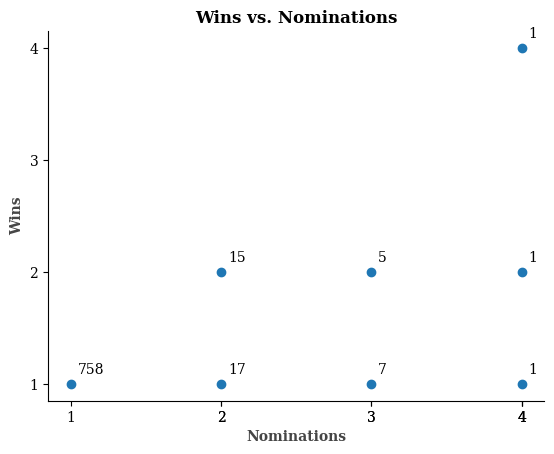

In [104]:
# Extract data from DataFrame
nominations = temp2['Nominations']
wins = temp2['Wins']
artists = temp2['Artist']

# Plotting the scatter plot
fig, ax = plt.subplots()   # Set the figure size (width, height)

# Scatter plot
ax.scatter(nominations, wins)

# Add labels and title
plt.xlabel('Nominations')
plt.ylabel('Wins')
plt.title('Wins vs. Nominations')

annotation_offset = (5, 5)

# Add artist names as annotations (hover data)
for i, artist in enumerate(artists):
    plt.annotate(artist, (nominations[i], wins[i]), xytext=annotation_offset,
                 textcoords='offset points', ha='left', va='bottom')

set_plot_style(ax, title = 'Wins vs. Nominations', xlabel = 'Nominations', ylabel='Wins', xticks=nominations, yticks=[1,2,3,4])



Year category by Year

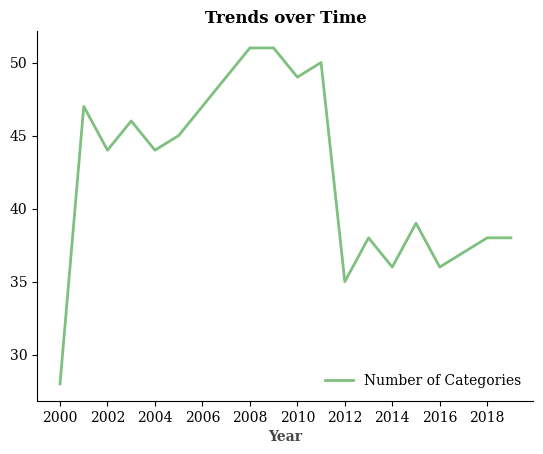

In [105]:
temp = data.groupby(by='year').category.unique().reset_index()
temp['category_num'] = [len(temp.category[x]) for x in range(len(temp.category))]

fig, ax = plt.subplots() 
ax.plot(temp.year, temp.category_num, label='Number of Categories', linestyle='-', color='g', alpha = 0.5, lw = 2)
set_plot_style(ax, title = 'Trends over Time', xlabel = 'Year', xticks = list(range(min(temp.year), max(temp.year)+1, 2)))

In [153]:
category_counts = data['category'].value_counts()

# Filter categories with more than 10 observations
filtered_categories = category_counts[category_counts > 15].index.tolist()
data['in_filtered'] = [(data.category[x] in filtered_categories) for x in range(len(data.category))]
data_filtered = data[data.in_filtered == True]

In [155]:
category_winner= data_filtered.groupby('category')['winner'].value_counts().unstack(fill_value=0)

winner,False,True
category,,
Album of the Year,13,17
Best Album Notes,4,19
Best Alternative Music Album,32,19
Best Americana Album,9,10
Best Bluegrass Album,8,19
Best Comedy Album,29,16
Best Contemporary Blues Album,6,15
Best Contemporary R&B Album,16,9
Best Country Album,29,16


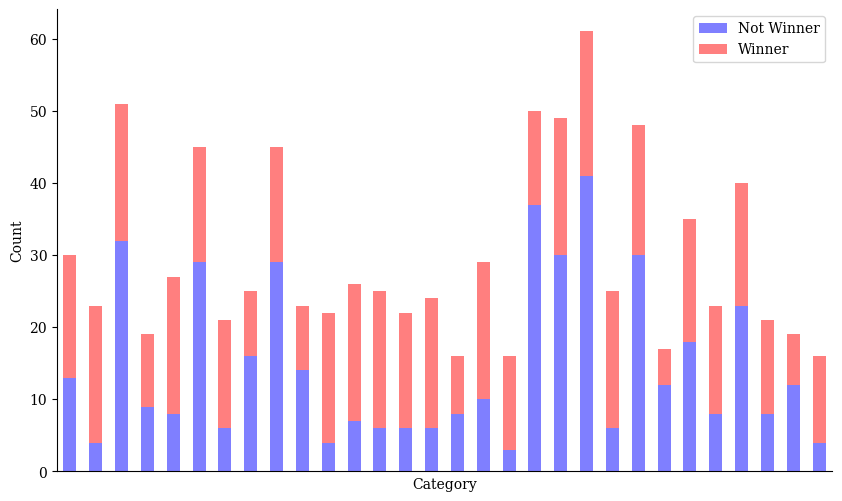

In [170]:
category_winner.plot(kind='bar', stacked=True, figsize=(10, 6), color = ['b', 'r'], alpha = 0.5)

plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks([], rotation=0) 


# Show legend
plt.legend(labels=['Not Winner', 'Winner'])

ax = plt.gca()
for spine in ('top', 'right'): 
        ax.spines[spine].set_visible(False)

# Show the plot
plt.show()

## Same but on the FINAL CLEANED dataset (alredy merged with review batches)

In [3]:
data_USED = pd.read_csv('all_data_FINAL_FILT.csv').drop('Unnamed: 0', axis = 1)
print(data_USED.shape)
data_USED.head()

(335, 15)


,year,category,nominee,workers,winner,grammy_date,workers_clean,nominee_semiclean,url_final,rating_before,rating_after,sentiment_before,sentiment_after,num_reviews_before,num_reviews_after
0,2002,Best R&B Album,Songs In A Minor,Alicia Keys (artist/producer),True,2002-02-27,alicia-keys,songs-in-a-minor,https://rateyourmusic.com/release/album/alicia...,5.0,3.725000,0.998884,0.803954,2.0,41.0
1,2002,Best Alternative Music Album,Parachutes,"Guy Berryman (producer), Jon Buckland (produce...",True,2002-02-27,coldplay,parachutes,https://rateyourmusic.com/release/album/coldpl...,5.0,3.632353,0.998897,0.808332,3.0,208.0
2,2003,Best Rock Album,The Rising,"Bruce Springsteen (artist), Brendan O'Brien (p...",True,2003-02-23,bruce-springsteen,the-rising,https://rateyourmusic.com/release/album/bruce-...,3.9,3.809859,0.599323,0.804557,5.0,72.0
3,2003,Best Score Soundtrack Album for a Motion Pictu...,The Lord of the Rings: The Fellowship of the Ring,"Howard Shore (artist/composer/producer), John ...",True,2003-02-23,howard-shore,the-lord-of-the-rings-the-fellowship-of-the-ring,https://rateyourmusic.com/release/album/howard...,5.0,4.409091,0.998876,0.955083,2.0,23.0
4,2003,Best Rap Album,The Eminem Show,"Eminem (artist/producer), Steve King (engineer...",True,2003-02-23,eminem,the-eminem-show,https://rateyourmusic.com/release/album/eminem...,4.5,3.710526,0.998873,0.703114,1.0,101.0


In [4]:
data_USED.winner.value_counts()

winner
True     176
False    159
Name: count, dtype: int64

In [5]:
temp = data_USED.groupby(by='year')['winner'].value_counts().unstack().reset_index().fillna(0)

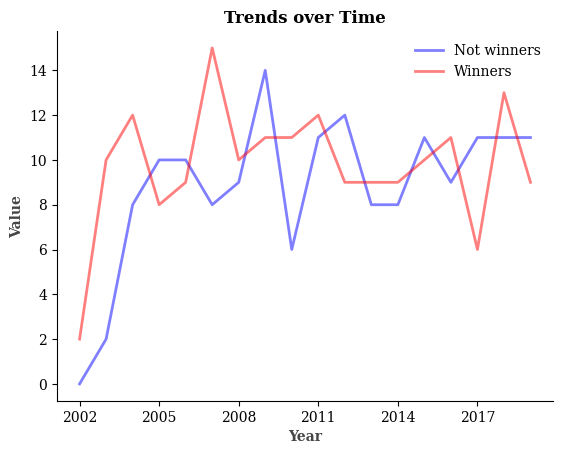

In [6]:
fig, ax = plt.subplots()
ax.plot(temp.year, temp[False], label='Not winners', linestyle='-', color='b', alpha = 0.5, lw = 2)
ax.plot(temp.year, temp[True], label='Winners', linestyle='-', color='r', alpha = 0.5, lw = 2)
set_plot_style(ax, title = 'Trends over Time', xlabel = 'Year', ylabel='Value', xticks = list(range(min(temp.year), max(temp.year)+1, 3)))

In [7]:
category_counts = data_USED['category'].value_counts()

# Filter categories with more than 10 observations
filtered_categories = category_counts[category_counts > 5].index.tolist()
data_USED['in_filtered'] = [(data_USED.category[x] in filtered_categories) for x in range(len(data_USED.category))]
data_filtered = data_USED[data_USED.in_filtered == True]

In [8]:
category_winner= data_filtered.groupby('category')['winner'].value_counts().unstack(fill_value=0)

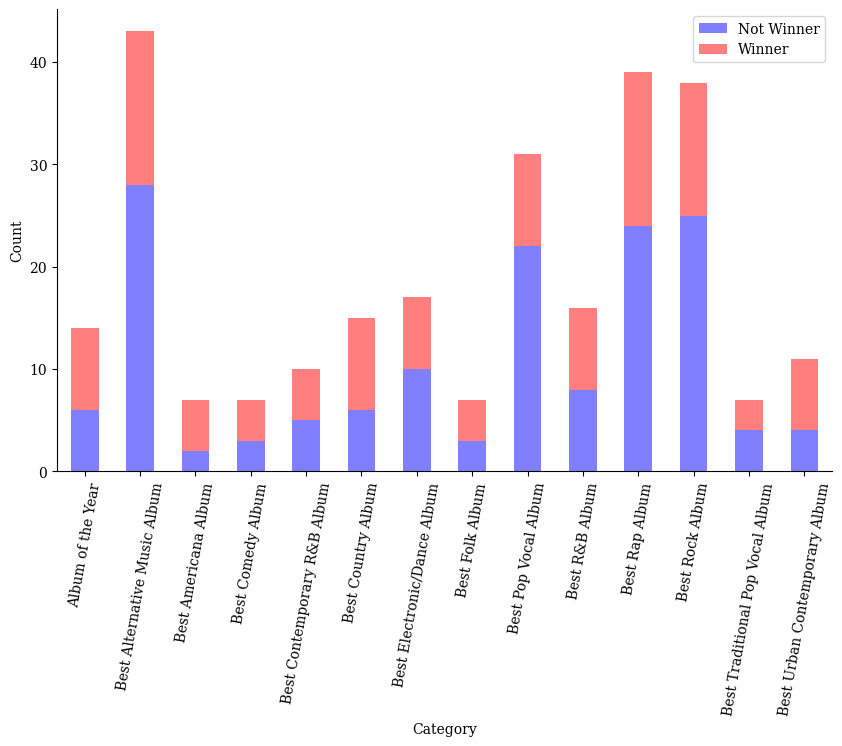

In [9]:
category_winner.plot(kind='bar', stacked=True, figsize=(10, 6), color = ['b', 'r'], alpha = 0.5)

plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=80) 


# Show legend
plt.legend(labels=['Not Winner', 'Winner'])

ax = plt.gca()
for spine in ('top', 'right'): 
        ax.spines[spine].set_visible(False)

# Show the plot
plt.show()

Number of reviews Pre-Post and vs year/category

In [10]:
temp = data_USED.groupby(by='year')[['num_reviews_before', 'num_reviews_after']].sum().reset_index()

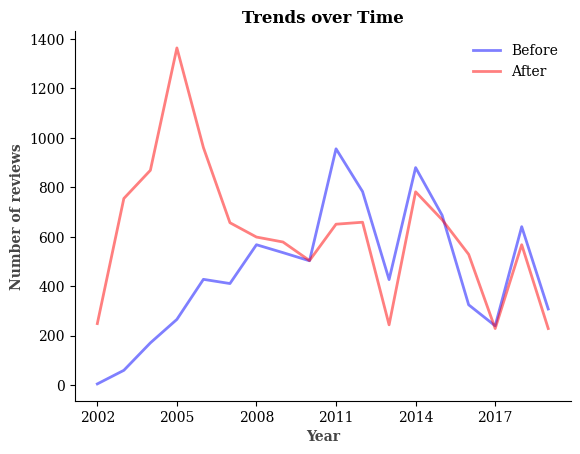

In [11]:
fig, ax = plt.subplots()
ax.plot(temp.year, temp.num_reviews_before, label='Before', linestyle='-', color='b', alpha = 0.5, lw = 2)
ax.plot(temp.year, temp.num_reviews_after, label='After', linestyle='-', color='r', alpha = 0.5, lw = 2)
set_plot_style(ax, title = 'Trends over Time', xlabel = 'Year', ylabel='Number of reviews', xticks = list(range(min(temp.year), max(temp.year)+1, 3)))

Number of Albums over time

In [12]:
temp = data_USED.groupby(by='year')['nominee'].nunique().reset_index()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


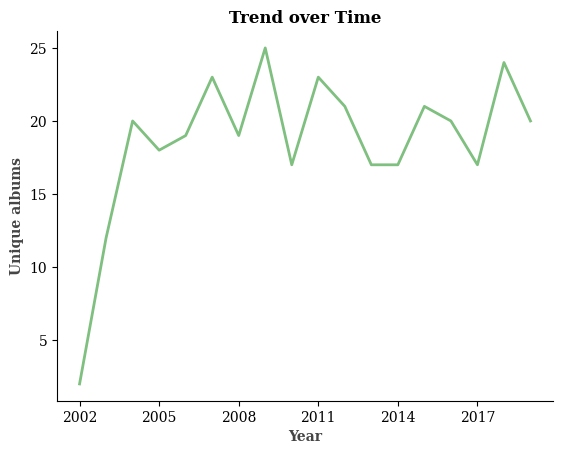

In [13]:
fig, ax = plt.subplots()
ax.plot(temp.year, temp.nominee, linestyle='-', color='g', alpha = 0.5, lw = 2)
set_plot_style(ax, title = 'Trend over Time', xlabel = 'Year', ylabel='Unique albums', xticks = list(range(min(temp.year), max(temp.year)+1, 3)))

Number of Reviews before and after vs Treatment

In [14]:
temp = data_USED.groupby(by='winner')[['num_reviews_before', 'num_reviews_after']].sum()

In [15]:
temp

,num_reviews_before,num_reviews_after
winner,,
False,4277.0,4318.0
True,3918.0,6779.0


Correlation Rating vs Sentiment Score

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


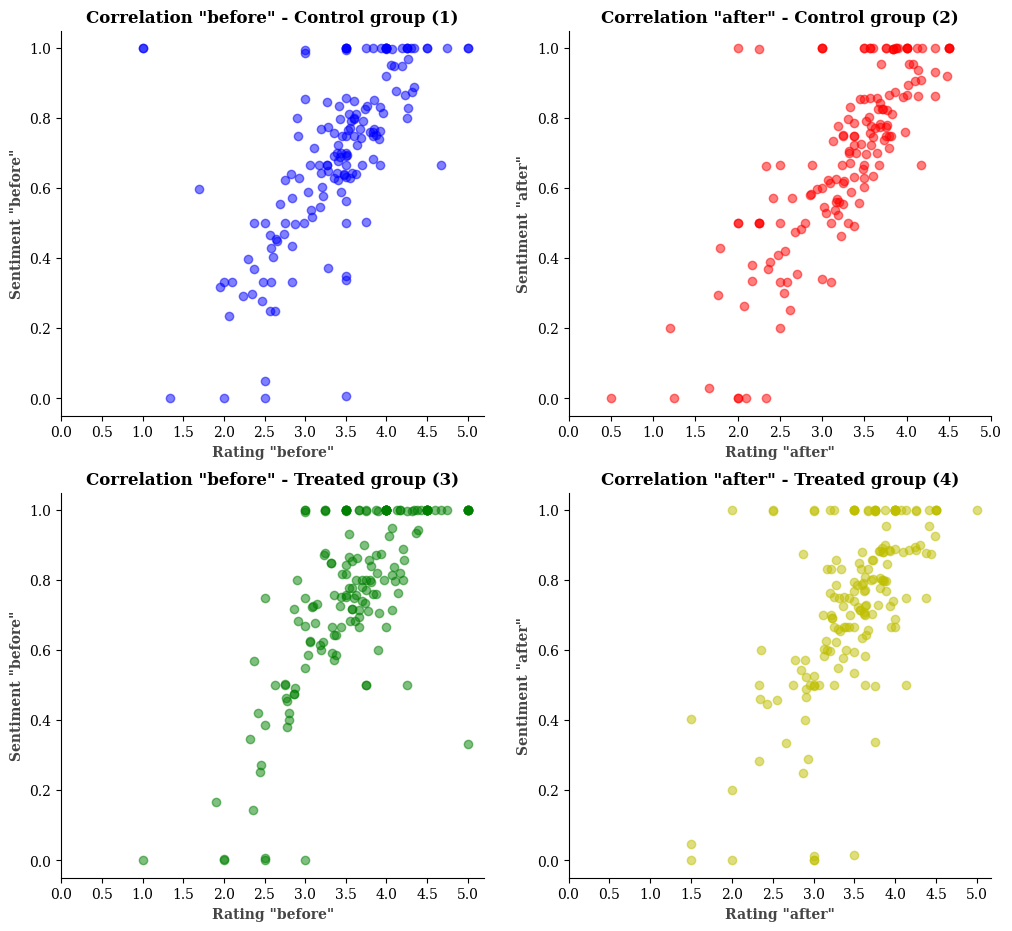

In [16]:

df_winner_true = data_USED[data_USED['winner'] == True]
df_winner_false = data_USED[data_USED['winner'] == False]

fig, axs = plt.subplots(2,2, figsize=(12,11))
ax = axs[0, 0]
ax.scatter(df_winner_false.rating_before, df_winner_false.sentiment_before, color = 'b', alpha=0.5, lw=1, label= '')
set_plot_style(ax,title='Correlation "before" - Control group (1)' ,xlabel='Rating "before"',ylabel='Sentiment "before"', xticks=[i/2 for i in range(0, 11)])
ax = axs[0, 1]
ax.scatter(df_winner_false.rating_after, df_winner_false.sentiment_after, color = 'r', alpha=0.5, lw=1, label= '')
set_plot_style(ax,title='Correlation "after" - Control group (2)',xlabel='Rating "after"',ylabel='Sentiment "after"', xticks=[i/2 for i in range(0, 11)])
ax = axs[1, 0]
ax.scatter(df_winner_true.rating_before, df_winner_true.sentiment_before, color = 'g', alpha=0.5, lw=1, label= '')
set_plot_style(ax,title='Correlation "before" - Treated group (3)',xlabel='Rating "before"',ylabel='Sentiment "before"', xticks=[i/2 for i in range(0, 11)])
ax = axs[1, 1]
ax.scatter(df_winner_true.rating_after, df_winner_true.sentiment_after, color = 'y', alpha=0.5, lw=1, label= '')
set_plot_style(ax,title='Correlation "after" - Treated group (4)',xlabel='Rating "after"',ylabel='Sentiment "after"', xticks=[i/2 for i in range(0, 11)])



### DID graphically 

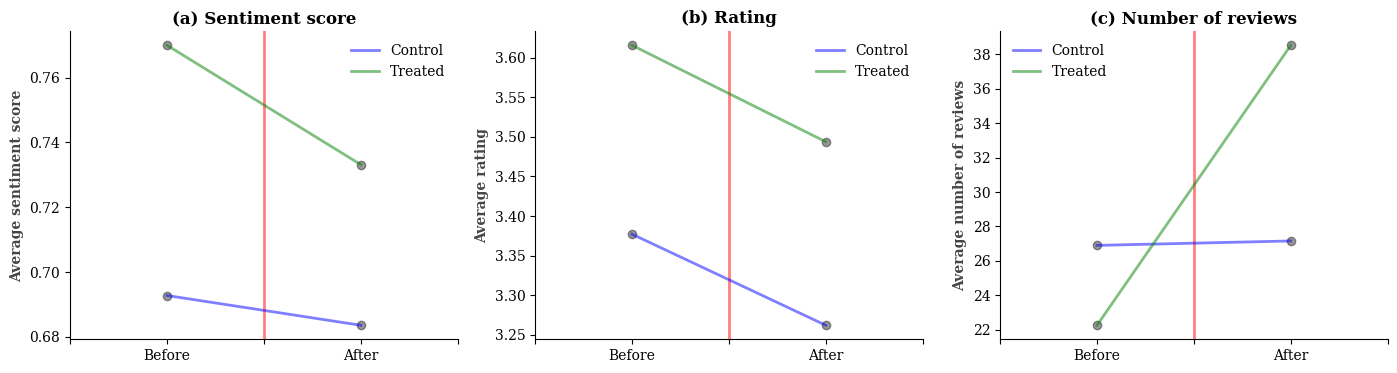

In [31]:
x_points = [1, 1, 3, 3]
y_points = [df_winner_false.sentiment_before.mean(), df_winner_true.sentiment_before.mean(), df_winner_false.sentiment_after.mean(), df_winner_true.sentiment_after.mean()]

fig, axs = plt.subplots(1, 3, figsize = (17, 4))

ax = axs[0]
ax.plot(x_points, y_points, 'o', color = 'black', alpha = 0.4)  
ax.axvline(x=2, color='r', linestyle='-', linewidth=2, alpha = 0.5)
ax.plot([1, 3], [df_winner_false.sentiment_before.mean(), df_winner_false.sentiment_after.mean()], linestyle='-', color='b', linewidth=2, alpha = 0.5, label = 'Control')
ax.plot([1, 3], [df_winner_true.sentiment_before.mean(), df_winner_true.sentiment_after.mean()], linestyle='-', color='g', linewidth=2, alpha = 0.5, label = 'Treated')
set_plot_style(ax,ylabel='Average sentiment score', xticks=[0, 1,2, 3, 4], xticklabels=['','Before','', 'After',''], title= '(a) Sentiment score')

ax = axs[1]
y_points = [df_winner_false.rating_before.mean(), df_winner_true.rating_before.mean(), df_winner_false.rating_after.mean(), df_winner_true.rating_after.mean()]
ax.plot(x_points, y_points, 'o', color = 'black', alpha = 0.4)  
ax.axvline(x=2, color='r', linestyle='-', linewidth=2, alpha = 0.5)
ax.plot([1, 3], [df_winner_false.rating_before.mean(), df_winner_false.rating_after.mean()], linestyle='-', color='b', linewidth=2, alpha = 0.5, label = 'Control')
ax.plot([1, 3], [df_winner_true.rating_before.mean(), df_winner_true.rating_after.mean()], linestyle='-', color='g', linewidth=2, alpha = 0.5, label = 'Treated')
set_plot_style(ax,xlabel='',ylabel='Average rating', xticks=[0, 1,2, 3, 4], xticklabels=['','Before','', 'After',''], title= '(b) Rating')

ax = axs[2]
y_points = [df_winner_false.num_reviews_before.mean(), df_winner_true.num_reviews_before.mean(), df_winner_false.num_reviews_after.mean(), df_winner_true.num_reviews_after.mean()]
ax.plot(x_points, y_points, 'o', color = 'black', alpha = 0.4)  
ax.axvline(x=2, color='r', linestyle='-', linewidth=2, alpha = 0.5)
ax.plot([1, 3], [df_winner_false.num_reviews_before.mean(), df_winner_false.num_reviews_after.mean()], linestyle='-', color='b', linewidth=2, alpha = 0.5, label = 'Control')
ax.plot([1, 3], [df_winner_true.num_reviews_before.mean(), df_winner_true.num_reviews_after.mean()], linestyle='-', color='g', linewidth=2, alpha = 0.5, label = 'Treated')

set_plot_style(ax,xlabel='',ylabel='Average number of reviews', xticks=[0, 1,2, 3, 4], xticklabels=['','Before','', 'After',''], title = '(c) Number of reviews')
